### This jupyter notebook is to unit-test CFE model run

## Preparation

In [7]:
# Import modules
import json
from bmi_cfe import BMI_CFE

In [8]:
input_json = '../../data/unit_test/config_cfe.json'
params = {
    "forcing_file": "G:/Shared drives/Ryoko and Hilary/SMSigxModel/analysis/data/Mahurangi/forcing_daily_1998_2001.csv",
    "catchment_area_km2": 46.65,
    "soil_params": {
        "bb": 19.080695550153287,
        "satdk": 0.01008170270316948,
        "slop": 0.8654737986118407,
        "smcmax": 0.5326760673265668,
        "wltsmc": 0.2777108539408838,
        "satpsi":0.263,
        "D": 1
    },
    "max_gw_storage": 0.06556912678112185,
    "Cgw": 0.0016914714204583781,
    "expon": 3.0132285987222893,
    "K_nash": 0.5251687040317584,
    "refkdt": 3.731966760008156,
    "trigger_z_fact": 0.4589119685226617,
    "K_lf": 1.0,
    "num_nash_storage":2,
    "alpha_fc": 0.33, 
    "giuh_ordinates": [
        0.5,
        0.5
    ],
    "time_step_size": 86400, 
    "stand_alone": 1,
    "unit_test": 1,
    "compare_results_file": "G:/Shared drives/Ryoko and Hilary/SMSigxModel/analysis/data/Mahurangi/test_daily_1998_2001_sm_basinavg.csv"
}

with open(input_json, 'w') as outfile:
    json.dump(params, outfile, indent=4)

with open(input_json) as outfile:
    loaded_data = json.load(outfile)

## Run the model

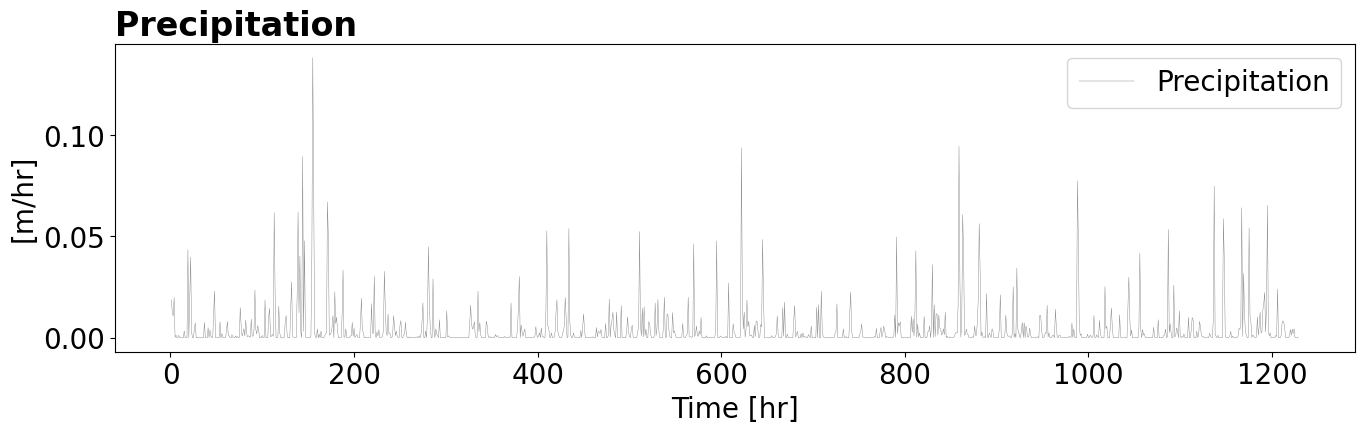

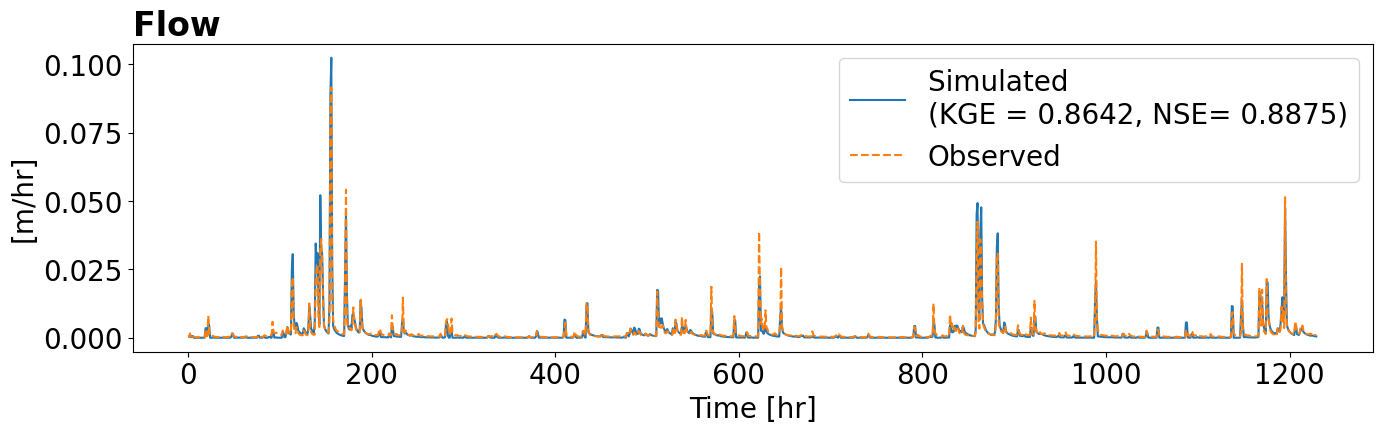

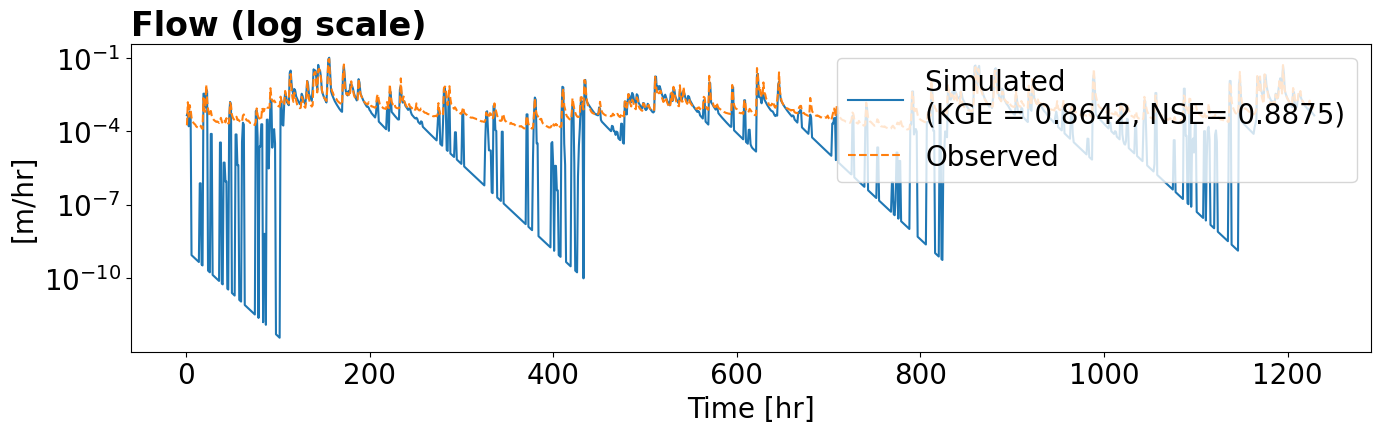

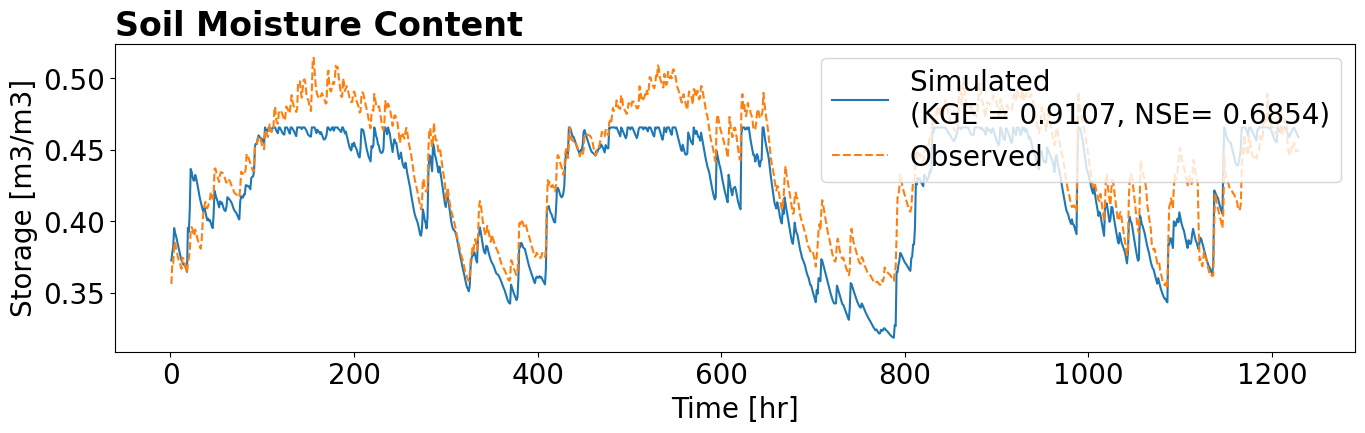

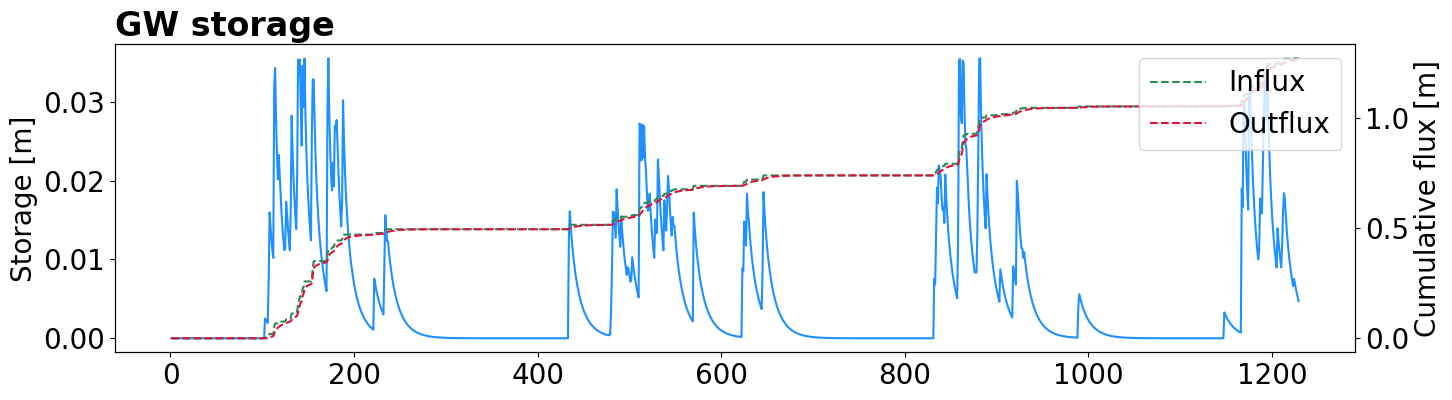

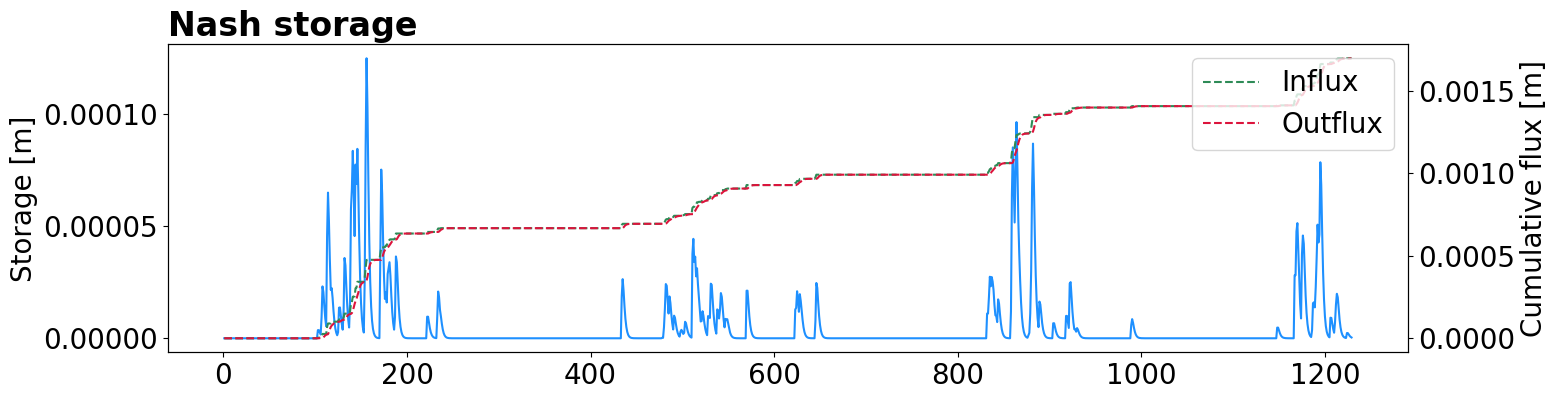

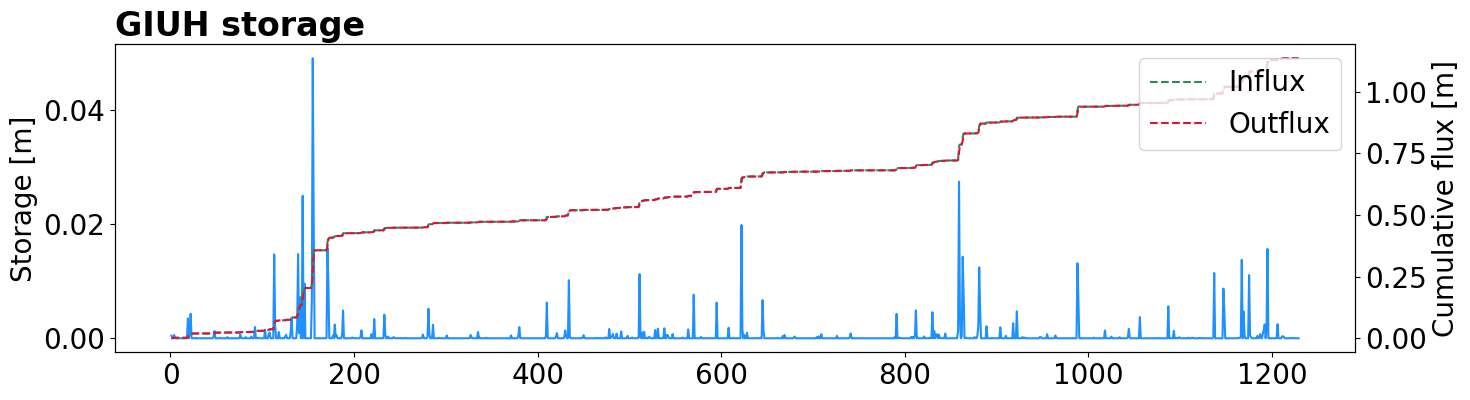


GLOBAL MASS BALANCE
      initial volume:   0.3613
        volume input:   5.9829
       volume output:   5.8578
        final volume:   0.4864
            residual: -4.0872e-06

 Discharge details
Cumulative discharge: 2.73
        Runoff ratio: 0.46
      Surface runoff: 0.47
  Deep GW to channel: 0.53
        Lateral flow: 0.00

 AET & PET
      volume PET:   4.0315
      volume AET:   3.1303
ET from rainfall:   1.2753
    ET from soil:   1.8550

SCHAAKE MASS BALANCE
    volume input:   5.9829
ET from rainfall:   1.2753
  surface runoff:   1.2801
             IOF:   1.2723
             SOF:   0.0078
    infiltration:   3.4275
schaake residual: -8.8818e-16

GIUH MASS BALANCE
  vol. into giuh:   1.2801
   vol. out giuh:   1.2801
 vol. end giuh q:   0.0000
   giuh residual: -4.0872e-06

SOIL WATER CONCEPTUAL RESERVOIR MASS BALANCE
   init soil vol:   0.3613
  vol. into soil:   3.4275
vol.soil2latflow:   0.0020
 vol. soil to gw:   1.4684
 vol. soil to ET:   1.8550
 final vol. soil:   0

In [9]:
cfe_instance = BMI_CFE(input_json)
cfe_instance.initialize()
cfe_instance.run_unit_test(
    plot=True,
    print_fluxes=False,
    plot_lims=list(range(1, 1230)),
    warm_up=True,
    warmup_offset=400,
    warmup_iteration=20
)
cfe_instance.finalize(print_mass_balance=True)